**Assignment 3: Neural Networks**

**Note:** This assignment will not have auto-grading. Please fill directly this notebook and make sure to plot the results when it is asked. 

In this assignement we will construct a single-layer neural networks for binary classification of linearly unseparable data.

In [3]:
from sklearn import datasets  
import numpy as np  
import matplotlib.pyplot as plt

Dataset Generation
------------------

We randomly generate samples in dimension $p=2$.

In [4]:
n = 400
np.random.seed(0)  
XX, labels = datasets.make_moons(n,noise=.1)
YY = labels.reshape(n)

Display data points.

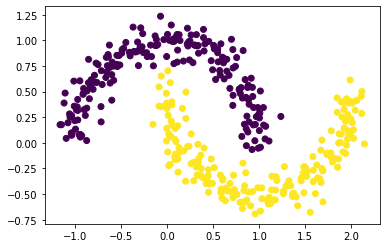

In [5]:
plt.scatter(XX[:,0], XX[:,1], c=YY)
plt.show()

Network Setup
--------------------

Let $m$ be the number of hidden units and $x$ the input. A neural network $\phi_W$ with one hidden layer operate by applying two successive dot products and non-linearities to compute an output $x_o = \phi_W(x)$, with $W=(W_h,W_o)$. The hidden variables are given by:

$$ \quad z_h= W_h (x,1), \quad x_h = \rho(z_h), \quad \mbox{ with } W_h \in \mathbb{R} ^{m \times (p+1)}. $$

The output $x_o$ can then be computed in the following way: 
$$ \quad z_o= W_o^T (x_h,1), \quad x_o = \rho(z_o), \quad \mbox{ with } W_o \in \mathbb{R} ^{p+1}. $$

The constant $1$ corresponds to the parameter of the bias term in the neural network. The function $\rho : \mathbb{R} \mapsto \mathbb{R} $ is called the nonlinearity.


The training is performed by minimizing the loss error between the predicted value $x_o = \phi_W(x)$ and the data (label) $y$:

$$ \min_{W} \mathbb{E}\Bigl( \frac{1}{2}\Bigl(y - \phi_W(x) \Bigl)^2 \Bigl). $$

Here, we use a least square error, but other choices such as logistic losses are possible.



Network nonlinearity
--------------------

1) Implement a (exponential) sigmoid function that will serve as the nonlinearity $\rho$ and its derivative $\rho'$



In [6]:
def rho(u): 
    return 1.0 / (1 + np.exp(-u))#insert here 
def rho_derivative(u):
    return (1.0 / (1 + np.exp(-u))) * (1-(1.0 / (1 + np.exp(-u))))


Plot the activation.

Text(0.5, 1.0, 'Sigmoid Function')

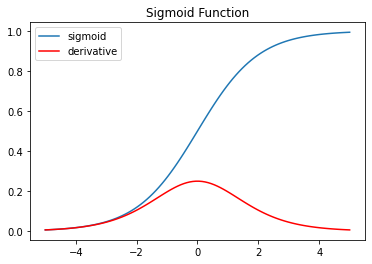

In [9]:
t = np.linspace(-5,5,100)
plt.plot(t, rho(t), label='sigmoid')
plt.plot(t, rho_derivative(t), c='r', label='derivative')
plt.legend()
plt.title('Sigmoid Function')

Network Evaluation
--------------------
2) Implement a function that evaluate the network for a given datapoint. This *foward pass* will be crucial for the computation of the gradient. 

In [ ]:
def forwardpass(x,wh,wo):
    #insert here
    zh = np.dot(wh, x)
    xh = rho(zh)
    xh = np.vstack((xh.reshape(xh.shape[0],1),1))# np.ones((xh.shape[0], 1))))
    zo = np.dot(wo.T, xh)
    xo = rho(zo)
    return zh, xh, zo, xo

Network Optimization
--------------------

The network parameters are obtained by minimizing the empirical loss using gradient descent. For each datapoint $x$, the error is given by $\mathcal{E}(W)=\frac{1}{2} (y-x_o)^2$, with $x_o = \phi_W(x)$.

The gradient of this error is computed using the so-called backpropagation which uses the chain rule to compute the gradients of $\mathcal{E}$ with respct to $\nabla \mathcal{E}=(W_h,W _o)$:

$$ \frac{d \mathcal{E}}{d W_o} = \frac{d \mathcal{E}}{d x_o} \frac{d x_o}{d z_o} \frac{d z_o}{d W_o} $$


$$ \frac{d \mathcal{E}}{d W_h} = \frac{d \mathcal{E}}{d x_o} \frac{d x_o}{d z_o} \frac{d z_o}{d x_h}  \frac{d x_h}{d z_h}  \frac{d z_h}{d W_h}$$


3) Using these formulae, implement a function to perform the the backward pass through the network; i.e, computes these derivatives. 

In [ ]:
def backwardpass(x,y,zh,xh,zo,xo, wo):
    #insert here
    # error = 0.5*(y - xo)**2
    dE_dwo = - (y - xo)*rho_derivative(zo)*xh
    
    dE_dxh = - wo.dot((y - xo)*rho_derivative(zo))[:-1,:]
    dE_dzh = dE_dxh.T*(rho_derivative(zh))
    dE_dwh = dE_dzh.T.dot(x.reshape(1, -1))
    return dE_dwo, dE_dwh

Each step of a stochastic gradient descent consist in updating the parameters $W_h$ and $W_o$ by evaluating the loss on a randomly chosen datapoint. 

$$W^{k+1} = W^{k} - \ell*\nabla \mathcal{E},$$

where $\ell$ is the learning rate. 

4) Implement a function SGD that performs one step of gradient descent on a datapoint.


In [ ]:
    def SGD(wh,wo,dE_dwo,dE_dwh,rate):
        #insert here
        wo = wo - rate*dE_dwo
        wh = wh - rate*dE_dwh
        return wh,wo

Training
--------------------

Now, we want to run the SGD algorithm over our dataset in order to train the network. We will use $15$ hidden layers and a learning rate of $0.1$. 

5) Implement a script that performs the forward pass and backpropagation, then SGD over the data. In practice, it is better to make many passes over the data (more gradient steps than datapoints) in order to minmize the variance of the gradient error. Here, we use $2.10^5$ iterations. Copute the error every 1000 iterations and plot the loss error.

In [ ]:
m = 15
rate = .1
iter = 2000
wh = np.random.rand(m,3)
wo = np.random.rand(m+1,1)
errors = np.zeros((iter))
for epoch in range(iter):
    for i in range(X_train.shape[0]):
        x = X_train[i,:]
        y = YY[i]
        zh, xh, zo, xo = forwardpass(x, wh, wo)
#         print(zh.shape)
#         print(xh.shape)

#         print(zo.shape)

#         print(xo.shape)

        dE_dwo, dE_dwh = backwardpass(x, y, zh, xh, zo, xo, wo)
        wh, wo = SGD(wh, wo, dE_dwh=dE_dwh, dE_dwo=dE_dwo, rate=0.01)
        error = 0.5*(y - xo)**2
        errors[epoch]= error
    if epoch%1000 == 0:
        print(f'Error in epoch {epoch}: {error}')

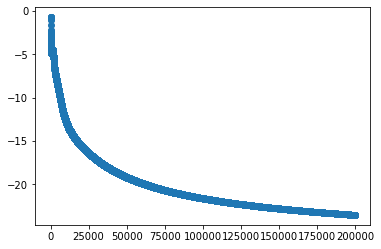

In [ ]:
plt.scatter(np.arange(errors.shape[0]), np.log(errors))

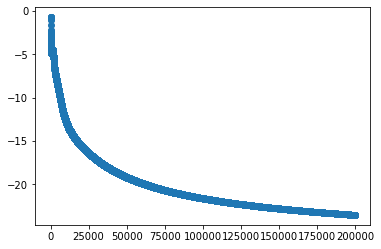

In [ ]:
plt.scatter(np.arange(errors.shape[0]), np.log(errors))

Prediction
--------------------

6.1) Now that the network is trained, implement a function *prediction* that runs a foward pass on any input point and predict the label; i.e, labels it with the first class if the output $x_0$ is smaller than $1/2$ and the second class if the output $x_0$ is larger than $1/2$.

6.2) Generate a set of evaluation points on $\mathbb{ℝ}^p$ grid and test the results on the gridpoints. Plot the classification results.

In [ ]:
def prediction(x,wh,wo):
    x = np.vstack((x, 1))
    _, _, _, xo = forwardpass(x, wh=wh, wo=wo)
    if xo < 0.5:
        return 0
    else:
        return 1
    

In [ ]:
def generate_grid(xmin,xmax,ymin,ymax,ngrid):
    U = np.linspace(xmin,xmax,ngrid)
    V = np.linspace(ymin,ymax,ngrid)

    return U,V

In [ ]:
ngrid = 50
xmin = -1.5
xmax = 2.5
ymin =-1
ymax =2


U,V = generate_grid(xmin,xmax,ymin,ymax,ngrid)

#insert here

In [ ]:
Xs =  np.random.uniform(low=xmin, high=xmax, size=(500,))
Ys = np.random.uniform(low=ymin, high=ymax, size=(500,))

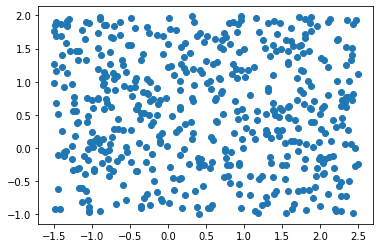

In [ ]:
plt.scatter(Xs,Ys)

In [ ]:
predictions = np.zeros_like(Xs)
predictions.shape

(500,)

In [ ]:
for i in range(predictions.shape[0]):
    x = np.array([Xs[i],Ys[i]]).reshape(-1,1)
    predictions[i] = prediction(x, wo=wo, wh=wh)

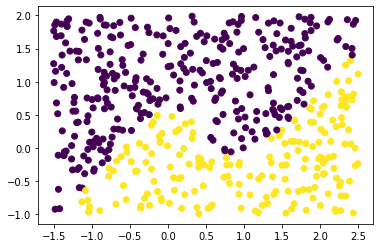

In [ ]:
plt.scatter(Xs, Ys ,c = predictions)

Network Behaviour
--------------------

Now, we are going to look at the behaviour of such a network using a [ Neural Network playgroud](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.62565&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).


7) Use the input data two-cercles. Use a linear activation function and run the classification with different numbers of hidden layers and units. Comment the classification results and the behaviour of the test loss function. 

8) On the same data use now a ReLu activation function with $1$ hidden layer and $2$ neurons. Comment. Incease the number of hidden layers and keep the same number of neurons. Comment. What is the minimal number of neurons needed to model the hyperplan that seperate the data using ReLu.

9) Once you a minimum number of hidden layers and neurons is found for the classification, comment on the effect of adding more neuron and layers in terms of computation time and loss error variance.



Answers:
--------------------

Answer 7: 
- If we use the original input (i.e., with no transformation applied) and a linear activation function, then
the predictions are a linear combination of the input variables. Hence the learning of the network is limited, the error could not be further reduced (saturates around 0.5) and the underlying distribution could not be properly estimated.
- We need to either change the activation function or create more (non-linear) features from the input data (e.g., instead of taking just $x = [x_{0}, x_{1}]$, we take a polynomial of the input $x = [x_{0}, x_{1}, x_{0}^{2}, x_{1}^{2}]$, or apply other basis functions).

Answer 8:
- We can immidiately notice the difference in the decision boundary- predicted classes are no longer separated by a single line. The error is  reduced (~0.26).
- If we keep the number of neurons to two, however, then the predictions are still not very accurate. Increasing thedepth of the network effects negatively the performance both in terms of training time and  reducing the error. 
- Increasing the hidden neurons to 3, on the other hand we can notice the error drops to ~0.04 and the class separation is more accurate. Therefore, the minimum number of units for the hidden layer is 3. 

Answer 9:
- Increasing the size of the network leads to higher variance of the error and longer training time.

